# Web Scraping NBA data (2010-2020) from ESPN.

In [2]:
### Functions Cell

import pandas as pd
from urllib.request import urlopen 
from bs4 import BeautifulSoup as soup

def make_soup(url):
    page = urlopen(url)
    soupData = soup(page, "html.parser")
    return soupData


def getTableHeaders(soup, year):
    lis = []
    lis.append(year)
    for record in soup.find_all('tr'):
        for data in record.find_all('th'):
            lis.append(data.text)
    return lis


def getDataRow(indexNum, soup, yearNum):
    lis = []
    lis.append(str(yearNum))
    for record in soup.find_all('tr',{'data-idx' : '{}'.format(indexNum)}):
        for data in record.find_all('td'):
            lis.append(data.text)
    return lis

def getAllData(soup, numTeams, yearNum):
    y = []
    for i in range(numTeams):
        x = getDataRow(i, soup, str(yearNum))
        y.append(x)
    return y  


def addYearCol(dic, yearNum):
    dic['Year']=[year for i in data]
    return dic

def toDict(keys, values):
    nbaDataDic = {}
    cnt=0
    for i in headers: #headers
        nbaDataDic[i]= []
        for j in nbaDataList: #data
            for x in j:
                nbaDataDic[i].append(x[cnt])
        cnt+=1
    return nbaDataDic





In [3]:
year = 'Year'
yearNum = 2020
numTeams= 30

### getting the table headers


nbaDataList = []

url = 'https://www.espn.com/nba/stats/team/_/season/{}/seasontype/2'.format(yearNum)
page = make_soup(url)

headers = getTableHeaders(page, year)

## getting the data from each year, meaning we have to look at each webpage so we use a loop

for i in range(yearNum,yearNum-11,-1):
    url = 'https://www.espn.com/nba/stats/team/_/season/{}/seasontype/2'.format(i)
    page = make_soup(url)
    data = getAllData(page, numTeams, i)
    nbaDataList.append(data)
    

    


In [4]:

## putting the headers and nbaDataList lists into a dictionary

nbaDataDic = toDict(headers, nbaDataList)



In [5]:
### creating a list for the columns that we want to change to a numeric type

others = headers[:3]

for i in others:
    headers.remove(i)

print(headers,others)

['GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF'] ['Year', 'RK', 'Team']


In [6]:



ballData= pd.DataFrame(nbaDataDic)
#ballData = ballData.astype(dataTypeDic)

## selecting the columns we want to change to a numeric data type and then applying the method
ballData[headers] = ballData[headers].apply(pd.to_numeric)

#ballData['GP'] = ballData.GP.astype(float)

In [7]:
###### Pandas ########

ballData.head()

,Year,RK,Team,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
0,2020,1,Milwaukee Bucks,65,118.6,43.5,91.2,47.7,13.7,38.6,...,24.0,74.2,9.5,42.2,51.7,25.9,7.4,6.0,14.4,19.2
1,2020,2,Houston Rockets,64,118.1,41.1,90.7,45.4,15.4,44.3,...,26.0,78.7,10.4,34.6,44.9,21.5,8.5,5.1,14.1,21.6
2,2020,3,Dallas Mavericks,67,116.4,41.6,90.0,46.2,15.3,41.5,...,23.1,77.3,10.6,36.4,47.0,24.5,6.3,5.0,12.2,19.0
3,2020,4,New Orleans Pelicans,64,116.2,42.6,92.2,46.2,14.0,37.6,...,23.2,72.9,11.2,35.8,47.0,27.0,7.6,5.1,15.7,21.0
4,2020,4,LA Clippers,64,116.2,41.6,89.7,46.4,12.2,33.2,...,26.2,79.2,11.0,37.0,48.0,23.8,7.1,5.0,14.1,22.0


In [8]:
ballData.dtypes

Year     object
RK       object
Team     object
GP        int64
PTS     float64
FGM     float64
FGA     float64
FG%     float64
3PM     float64
3PA     float64
3P%     float64
FTM     float64
FTA     float64
FT%     float64
OR      float64
DR      float64
REB     float64
AST     float64
STL     float64
BLK     float64
TO      float64
PF      float64
dtype: object

In [9]:

#ballData.info()

ballData.describe()


,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,78.969697,102.971212,38.415152,84.271515,45.589091,8.564545,24.042727,35.513030,17.570909,23.101212,76.102424,10.630000,32.487879,43.117576,22.451515,7.635152,4.896061,13.910909,20.309394
std,6.435015,6.265003,2.047331,3.498073,1.532268,2.464505,6.623484,1.810652,1.831106,2.346387,2.954271,1.227686,2.164996,2.168003,2.124173,0.855613,0.752069,1.097387,1.429053
min,63.000000,87.000000,33.200000,75.800000,40.800000,3.800000,11.300000,29.500000,12.200000,16.600000,66.000000,7.600000,27.200000,36.900000,18.000000,5.500000,2.400000,11.000000,16.600000
25%,82.000000,98.200000,37.000000,81.800000,44.425000,6.600000,18.900000,34.325000,16.400000,21.400000,74.500000,9.800000,30.900000,41.700000,21.000000,7.100000,4.300000,13.200000,19.300000
50%,82.000000,102.700000,38.300000,84.050000,45.500000,8.400000,23.300000,35.500000,17.500000,23.000000,76.200000,10.600000,32.450000,43.000000,22.300000,7.600000,4.900000,14.000000,20.300000
75%,82.000000,106.700000,39.600000,86.900000,46.600000,10.300000,28.875000,36.700000,18.700000,24.600000,78.100000,11.500000,34.000000,44.500000,23.700000,8.200000,5.400000,14.600000,21.300000
max,82.000000,118.600000,44.000000,94.000000,50.300000,16.100000,45.400000,41.600000,24.100000,31.100000,82.800000,14.600000,42.200000,51.700000,30.400000,10.000000,8.200000,17.000000,24.800000


In [10]:
### Getting the mean of some columns

ballData['PTS'].std()

###. For over/under recommendations.  Find the average points of a team thats playing.  
###. Find out if the distribution of the points is normal.
###. if it is then find the standard deviations and compare the over under to where they stand on the distribution chart 
###. if it is within one std then it is likely if it is 2 away then its less likely and so on.

6.265003029846543

In [11]:
ballData['PTS'].cumsum()

0        118.6
1        236.7
2        353.1
3        469.3
4        585.5
        ...   
325    33603.1
326    33698.8
327    33794.1
328    33888.1
329    33980.5
Name: PTS, Length: 330, dtype: float64

In [12]:
ballData.groupby(['Year','PTS']).mean()

GP   FGM    FGA   FG%   3PM   3PA   3P%    FTM   FTA    FT%  \
Year PTS                                                                    
2010 92.4   82.0  34.3  79.90  42.9   4.6  14.5  31.8  19.20  24.6  78.00   
     94.0   82.0  35.9  80.50  44.5   4.6  14.5  31.4  17.70  24.4  72.80   
     95.3   82.0  34.9  76.90  45.3   5.6  16.2  34.6  20.00  26.6  75.10   
     95.7   82.0  36.6  80.50  45.5   5.9  17.8  33.2  16.60  22.8  73.00   
     96.2   82.0  36.7  81.70  44.9   5.3  14.9  35.3  17.60  23.1  76.20   
...          ...   ...    ...   ...   ...   ...   ...    ...   ...    ...   
2020 115.6  64.0  41.9  91.00  46.1  12.3  33.1  37.2  19.50  24.8  78.70   
     116.2  64.0  42.1  90.95  46.3  13.1  35.4  36.9  18.85  24.7  76.05   
     116.4  67.0  41.6  90.00  46.2  15.3  41.5  36.9  17.90  23.1  77.30   
     118.1  64.0  41.1  90.70  45.4  15.4  44.3  34.8  20.50  26.0  78.70   
     118.6  65.0  43.5  91.20  47.7  13.7  38.6  35.6  17.80  24.0  74.20   

              OR    DR   REB   AST   STL   BLK    TO    PF  
Year PTS                                                    
2010 92.4   10.9  28.8  39.7  18.8  7.00  4.80  14.4  20.0  
     94.0   12.8  27.3  40.2  19.4  7.30  3.80  13.4  22.2  
     95.3   10.5  30.4  40.8  20.2  7.70  5.40  15.7  19.5  
     95.7   11.3  30.5  41.8  22.1  6.50  5.70  15.7  19.3  
     96.2   11.8  30.0  41.8  19.0  6.00  5.10  14.9  21.4  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2020 115.6  10.1  31.6  41.7  25.3  8.10  4.30  13.4  22.6  
     116.2  11.1  36.4  47.5  25.4  7.35  5.05  14.9  21.5  
     116.4  10.6  36.4  47.0  24.5  6.30  5.00  12.2  19.0  
     118.1  10.4  34.6  44.9  21.5  8.50  5.10  14.1  21.6  
     118.6   9.5  42.2  51.7  25.9  7.40  6.00  14.4  19.2  

[297 rows x 18 columns]

In [13]:
ballData['Year'].unique()

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010'], dtype=object)

In [14]:
corr = ballData.corr()
corr

,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
GP,1.000000,-0.089725,-0.075015,-0.131853,0.051754,-0.155732,-0.170771,0.063973,0.068541,0.080484,-0.017599,-0.033934,-0.080859,-0.100312,-0.061325,-0.022274,-0.077275,-0.131275,0.070136
PTS,-0.089725,1.000000,0.910080,0.733747,0.533709,0.806439,0.781465,0.372953,0.299504,0.210558,0.254961,-0.255008,0.714237,0.568327,0.641128,0.169051,0.106069,-0.101054,0.132654
FGM,-0.075015,0.910080,1.000000,0.778860,0.618767,0.636617,0.603826,0.362974,0.019901,-0.053583,0.196485,-0.207937,0.661677,0.542470,0.721229,0.205259,0.134097,-0.124633,0.070990
FGA,-0.131853,0.733747,0.778860,1.000000,-0.009636,0.651630,0.687267,0.004335,-0.113328,-0.157815,0.108696,0.047089,0.625567,0.649901,0.493940,0.120627,-0.023150,-0.143844,0.129832
FG%,0.051754,0.533709,0.618767,-0.009636,1.000000,0.201958,0.106060,0.572808,0.174810,0.114819,0.173289,-0.393106,0.269859,0.047783,0.529473,0.181918,0.241041,-0.021675,-0.048273
3PM,-0.155732,0.806439,0.636617,0.651630,0.201958,1.000000,0.985411,0.378534,-0.012892,-0.060854,0.132625,-0.375101,0.672041,0.458224,0.522969,0.081227,-0.041942,-0.152365,0.022439
3PA,-0.170771,0.781465,0.603826,0.687267,0.106060,0.985411,1.000000,0.222323,-0.006087,-0.040194,0.097880,-0.330202,0.665847,0.477105,0.483664,0.092923,-0.057866,-0.126303,0.048774
3P%,0.063973,0.372953,0.362974,0.004335,0.572808,0.378534,0.222323,1.000000,-0.042634,-0.133811,0.230749,-0.374518,0.235576,0.024913,0.364632,-0.016640,0.066375,-0.189297,-0.116811
FTM,0.068541,0.299504,0.019901,-0.113328,0.174810,-0.012892,-0.006087,-0.042634,1.000000,0.924713,0.253571,0.096739,0.058296,0.113193,-0.123786,0.008803,0.119257,0.140454,0.265417
FTA,0.080484,0.210558,-0.053583,-0.157815,0.114819,-0.060854,-0.040194,-0.133811,0.924713,1.000000,-0.131085,0.222742,0.016457,0.142938,-0.181799,0.038752,0.101731,0.243036,0.279001


In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
fig, ax = plt.subplots(figsize=(50,30))
sb.set(font_scale=4)
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center =0,
    cmap= sb.diverging_palette(20, 220, n=200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [32]:
#ballData.to_csv('nbaData.csv')

Text(0.5, 1.0, 'Distribution of Points')

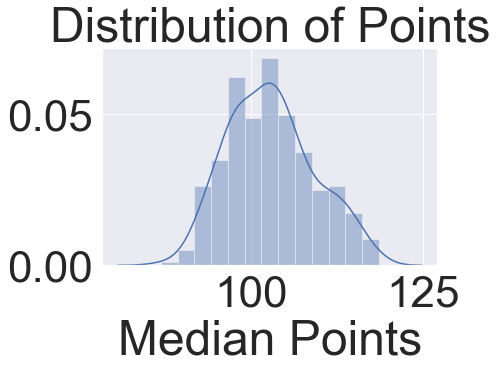

In [16]:
sb.distplot(ballData['PTS'])
plt.xlabel('Median Points')
plt.title('Distribution of Points')


In [17]:
import statsmodels.api as sm

In [18]:
import tensorflow as ts
import sklearn 
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle

In [27]:
dOut = np.array(['FGA','FG%','3PA','3P%','FTA','DR','Year','RK','Team', 'GP'])

In [28]:
## Making two data sets, 1 for the y var and other for the x var
predict = 'PTS'
## x is the first set of x values to run
## x2 us the second
#x = np.array(ballData.drop([predict,'Year','RK','Team', 'GP'], 1))
x2 = np.array(ballData.drop(dOut, 1))
y = np.array(ballData[predict])
print(x2)

[[118.6  43.5  13.7 ...   6.   14.4  19.2]
 [118.1  41.1  15.4 ...   5.1  14.1  21.6]
 [116.4  41.6  15.3 ...   5.   12.2  19. ]
 ...
 [ 95.3  34.9   5.6 ...   5.4  15.7  19.5]
 [ 94.   35.9   4.6 ...   3.8  13.4  22.2]
 [ 92.4  34.3   4.6 ...   4.8  14.4  20. ]]


In [30]:
## Splitting the data into a training set and a test set

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2,y, test_size = .2)







In [31]:
linear = linear_model.LinearRegression()

## This is going to use the data given to find a best fit line
linear.fit(x_train, y_train)
## This is going to give us an accuracy of our model
acc = linear.score(x_test, y_test)
print(acc)


1.0


In [32]:
print("coef: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

coef: 
 [ 1.00000000e+00 -8.66192868e-15 -4.46672217e-15 -4.49070344e-15
 -1.93986954e-16  5.17009115e-17 -2.12329723e-16 -2.15052028e-16
 -2.76286451e-16  5.99223500e-17 -4.57486485e-17  6.10367383e-18]
Intercept: 
 4.263256414560601e-14


In [33]:
## making predictions for the test data
predictions = linear.predict(x_test)

## this prints out the prediction, the x variables, and the actual value
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x], sep="\n")

104.49999999999996
[104.5  38.3   9.7  18.2  69.2   8.8  42.   22.8   8.6   5.6  12.4  21.3]
104.5
110.79999999999993
[110.8  40.3  10.4  19.8  79.7   8.1  42.7  21.9   7.6   5.   12.7  18.8]
110.8
97.29999999999995
[97.3 36.8  5.5 18.2 75.6 12.1 46.2 22.5  5.9  5.3 15.1 16.8]
97.3
103.39999999999995
[103.4  38.8  10.3  15.5  75.7   8.8  41.6  23.4   7.6   4.9  13.9  19.3]
103.4
108.99999999999994
[109.   40.4  12.6  15.6  76.9   9.6  42.5  23.4   7.6   4.2  13.7  21.9]
109.0
91.79999999999994
[91.8 35.5  5.5 15.4 77.8  7.7 38.8 23.6  7.5  5.5 14.8 19.9]
91.8
102.49999999999994
[102.5  39.3   4.2  19.7  73.3  13.   43.5  18.8   7.9   4.9  15.2  20.2]
102.5
106.69999999999995
[106.7  39.4  10.1  17.9  71.    9.6  42.6  24.8   7.8   5.   11.8  21.3]
106.7
104.89999999999996
[104.9  37.7  10.   19.4  81.5   8.8  43.6  23.1   7.    4.8  11.   16.6]
104.9
115.59999999999995
[115.6  41.9  12.3  19.5  78.7  10.1  41.7  25.3   8.1   4.3  13.4  22.6]
115.6
107.49999999999996
[107.5  38.4   8.1 